About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing the Dependencies

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving fake_news_dataset.csv to fake_news_dataset.csv


In [72]:
import pandas as pd

# Load CSVs
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

# Add a 'label' column to both
fake_df['label'] = 1
true_df['label'] = 0

# Combine the datasets
news_dataset = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# View basic info
print(news_dataset.head())
print(news_dataset['label'].value_counts())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1  
label
1    23481
0    21417
Name: count, dtype: int64


In [73]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
# printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Pre-processing

In [76]:
# Load the datasets
fake_df = pd.read_csv('/content/Fake.csv')   # contains fake news
true_df = pd.read_csv('/content/True.csv')   # contains true news

# Add labels: 1 for fake, 0 for true
fake_df['label'] = 1
true_df['label'] = 0

# Combine both into one DataFrame
news_dataset = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)


In [77]:
news_dataset.shape

(44898, 5)

In [146]:
# print the first 5 rows of the dataframe
news_dataset.head()

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,drunk brag trump staffer start russian collus ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,sheriff david clark becom internet joke threat...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,trump obsess even obama name code websit imag
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,pope franci call donald trump christma speech


In [79]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [80]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [96]:
# here not merging the column names as it is taking much time to do
news_dataset['content'] = news_dataset['title'] #+ ' ' + news_dataset['text'].str[:200]


In [97]:
print(news_dataset['content'])

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
44893    'Fully committed' NATO backs new U.S. approach...
44894    LexisNexis withdrew two products from Chinese ...
44895    Minsk cultural hub becomes haven from authorities
44896    Vatican upbeat on possibility of Pope Francis ...
44897    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


In [98]:
# separating the data & label
#X = news_dataset.drop(columns='label', axis=1)
X = news_dataset.drop(columns=['label', 'date'], axis=1)
Y = news_dataset['label']

In [99]:
print(X)
print(Y)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [100]:
port_stem = PorterStemmer()

In [101]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [102]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [103]:
print(news_dataset['content'])

0        donald trump send embarrass new year eve messa...
1        drunk brag trump staffer start russian collus ...
2        sheriff david clark becom internet joke threat...
3            trump obsess even obama name code websit imag
4            pope franci call donald trump christma speech
                               ...                        
44893    fulli commit nato back new u approach afghanistan
44894         lexisnexi withdrew two product chines market
44895                        minsk cultur hub becom author
44896      vatican upbeat possibl pope franci visit russia
44897              indonesia buy billion worth russian jet
Name: content, Length: 44898, dtype: object


In [104]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [105]:
print(X)

['donald trump send embarrass new year eve messag disturb'
 'drunk brag trump staffer start russian collus investig'
 'sheriff david clark becom internet joke threaten poke peopl eye' ...
 'minsk cultur hub becom author'
 'vatican upbeat possibl pope franci visit russia'
 'indonesia buy billion worth russian jet']


In [106]:
print(Y)

[1 1 1 ... 0 0 0]


In [107]:
Y.shape

(44898,)

In [108]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [109]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 411810 stored elements and shape (44898, 13206)>
  Coords	Values
  (0, 3339)	0.4152733860823366
  (0, 3404)	0.27228169452981993
  (0, 3731)	0.36585763997365384
  (0, 3949)	0.46737756630771704
  (0, 7335)	0.3506307808204068
  (0, 7866)	0.2355330109368446
  (0, 10341)	0.35617541225037314
  (0, 12010)	0.11874831789619875
  (0, 13104)	0.285897289994607
  (1, 1414)	0.39443884799795026
  (1, 2289)	0.41140099817201903
  (1, 3523)	0.45452116468198656
  (1, 5989)	0.3127247619981534
  (1, 9996)	0.28041269573559635
  (1, 11031)	0.4051439782731003
  (1, 11065)	0.3381297018822547
  (1, 12010)	0.11694584057077229
  (2, 999)	0.2899680869663155
  (2, 2144)	0.3679456237184158
  (2, 2881)	0.3373830961140794
  (2, 4067)	0.2910179557797341
  (2, 5960)	0.2946136857056743
  (2, 6194)	0.3180103625234714
  (2, 8601)	0.2337777620708223
  (2, 8836)	0.42473021917033454
  :	:
  (44893, 7866)	0.2316688299307463
  (44894, 2037)	0.3409101873703228
  (4489

Splitting the dataset to training & test data

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [111]:
model = LogisticRegression()

In [112]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [113]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [114]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9599922044657275


In [115]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [116]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9415367483296214


Making a Predictive System

In [130]:
X_new = X_test[5]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [131]:
print(Y_test[5])

0


In [134]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [135]:
print(Y_test[0])

1


In [136]:
X_new = X_test[10]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [137]:
print(Y_test[10])

1


In [138]:
X_new = X_test[20]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [139]:
print(Y_test[20])

0


In [140]:
X_new = X_test[4]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [141]:
print(Y_test[4])

0


In [142]:
X_new = X_test[1]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [143]:
print(Y_test[1])

1


/tmp/ipython-input-144-857427366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=news_dataset, palette='Set2')


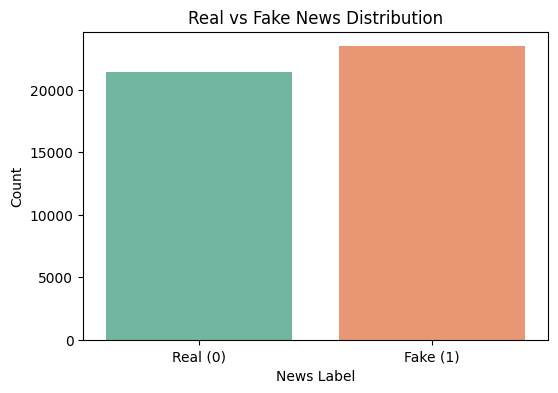

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of real vs fake news
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=news_dataset, palette='Set2')
plt.title('Real vs Fake News Distribution')
plt.xticks(ticks=[0, 1], labels=['Real (0)', 'Fake (1)'])
plt.xlabel('News Label')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-145-3264527610.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=freq_df, palette='rocket')


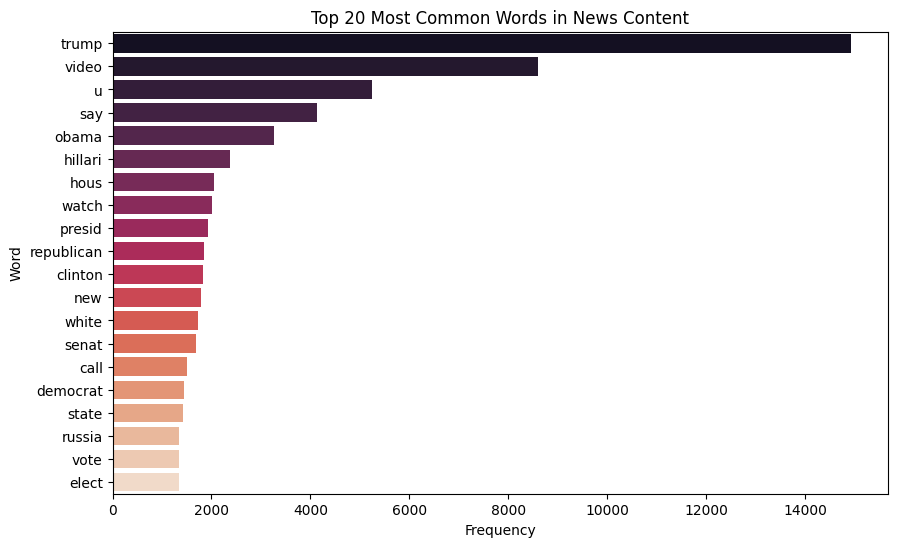

In [145]:
from collections import Counter

# Join all stemmed words
all_words = ' '.join(news_dataset['content']).split()

# Count the most common words
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette='rocket')
plt.title('Top 20 Most Common Words in News Content')
plt.show()
